## MLsecu

#### Introduction
The central aim is to employ this data chain for the purpose of anomaly detection, particularly in the context of tracking and identifying cyberattacks. To achieve this goal, the project will leverage the "Hardware In The Loop" dataset, offering an opportunity to explore the intricacies of cybersecurity data in a controlled and experimental environment. 

In [16]:
import pandas as pd
import seaborn as sns
from preprocessing import *
from models import *
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
# output for notebook with seaborn
%matplotlib inline

In [17]:
NET_COLS = ["dport", "proto", "flags", "size", "modbus_fn", "n_pkt_src", "n_pkt_dst", "modbus_response"]

## 1. Loading the dataset

In [18]:
net_attack = load_network_csv("dataset/Network datatset/csv/attack_1.csv")
phy_attack = load_physical_csv("dataset/Physical dataset/phy_att_1.csv")

In [19]:
# Getting a dataset with 20% being attacks:
pos = net_attack[(net_attack["label"] != 'anomaly') & (net_attack["label_n"] == 1)].iloc[:20000]
neg = net_attack[net_attack["label_n"] == 0].iloc[:80000]

In [20]:
net_attack = pd.concat([pos, neg])

We identify the perentage of value with label 1 (attack) in the dataset.

In [21]:
(net_attack["label_n"] == 1).sum() / len(net_attack.index)

0.2

## 2. Eploratory Data Analysis

In [22]:
net_attack.describe()

,sport,size,n_pkt_src,n_pkt_dst,label_n
count,99974.000000,100000.000000,99978.000000,99978.000000,100000.000000
mean,28496.163493,65.324330,30.605723,30.654354,0.200000
std,27964.352063,1.422287,17.494584,17.466949,0.400002
min,502.000000,60.000000,0.000000,0.000000,0.000000
25%,502.000000,65.000000,15.000000,15.000000,0.000000
50%,35261.000000,66.000000,19.000000,19.000000,0.000000
75%,56667.000000,66.000000,50.000000,50.000000,0.000000
max,60939.000000,78.000000,51.000000,52.000000,1.000000


### 1.1 Missing values

The dataset contains missing values in several columns, with the most prominent gaps in 'ip_s' and 'ip_d' (22 missing values each), 'modbus_fn' (2967 missing values), 'n_pkt_src' and 'n_pkt_dst' (22 missing values each), and 'modbus_response' (51483 missing values), while other columns have no missing data.

In [23]:
net_attack.isnull().sum()

Time                   0
mac_s                  0
mac_d                  0
ip_s                  22
ip_d                  22
sport                 26
dport                  0
proto                  0
flags                  0
size                   0
modbus_fn           2967
n_pkt_src             22
n_pkt_dst             22
modbus_response    51483
label_n                0
label                  0
dtype: int64

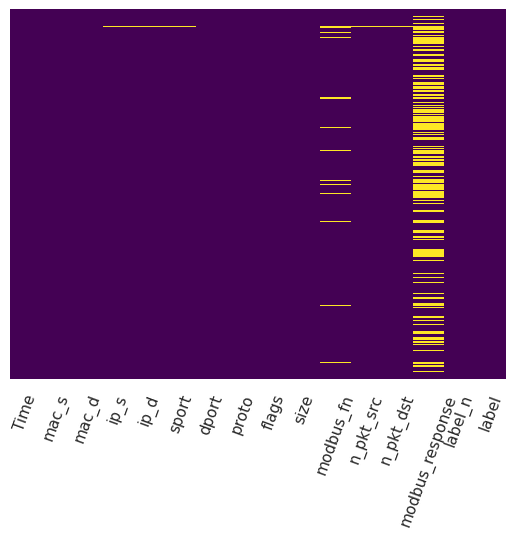

In [24]:
# Plotting missing values count per columns
sns.heatmap(net_attack.isnull(), cbar=False, xticklabels=True, yticklabels=False, cmap='viridis')
plt.xticks(rotation=70)
plt.show()

### 2.2 Target

We are analyzing the proportion of the target and trying to determine whether it's an attack or not.

/tmp/ipykernel_31678/3864173.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="label", data=net_attack, palette="Set2", order=net_attack["label"].value_counts().index);


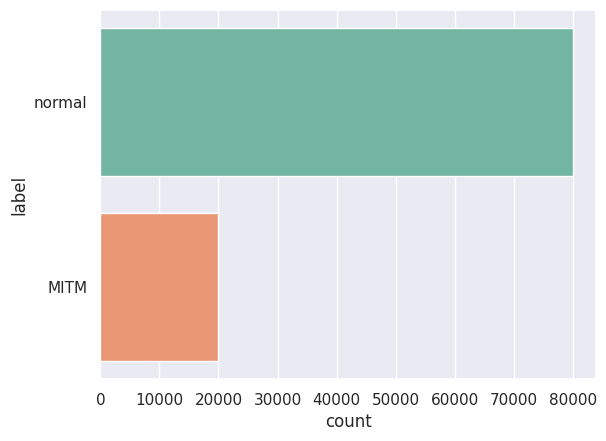

In [25]:
sns.countplot(y="label", data=net_attack, palette="Set2", order=net_attack["label"].value_counts().index);


#### 3. Numerical features

In [26]:
NUM_COLUMNS = net_attack._get_numeric_data().columns
num_columns = NUM_COLUMNS.drop("label_n")

We have a few numerical:
- sport
- size
- n_pkt_src
- n_pkt_dst


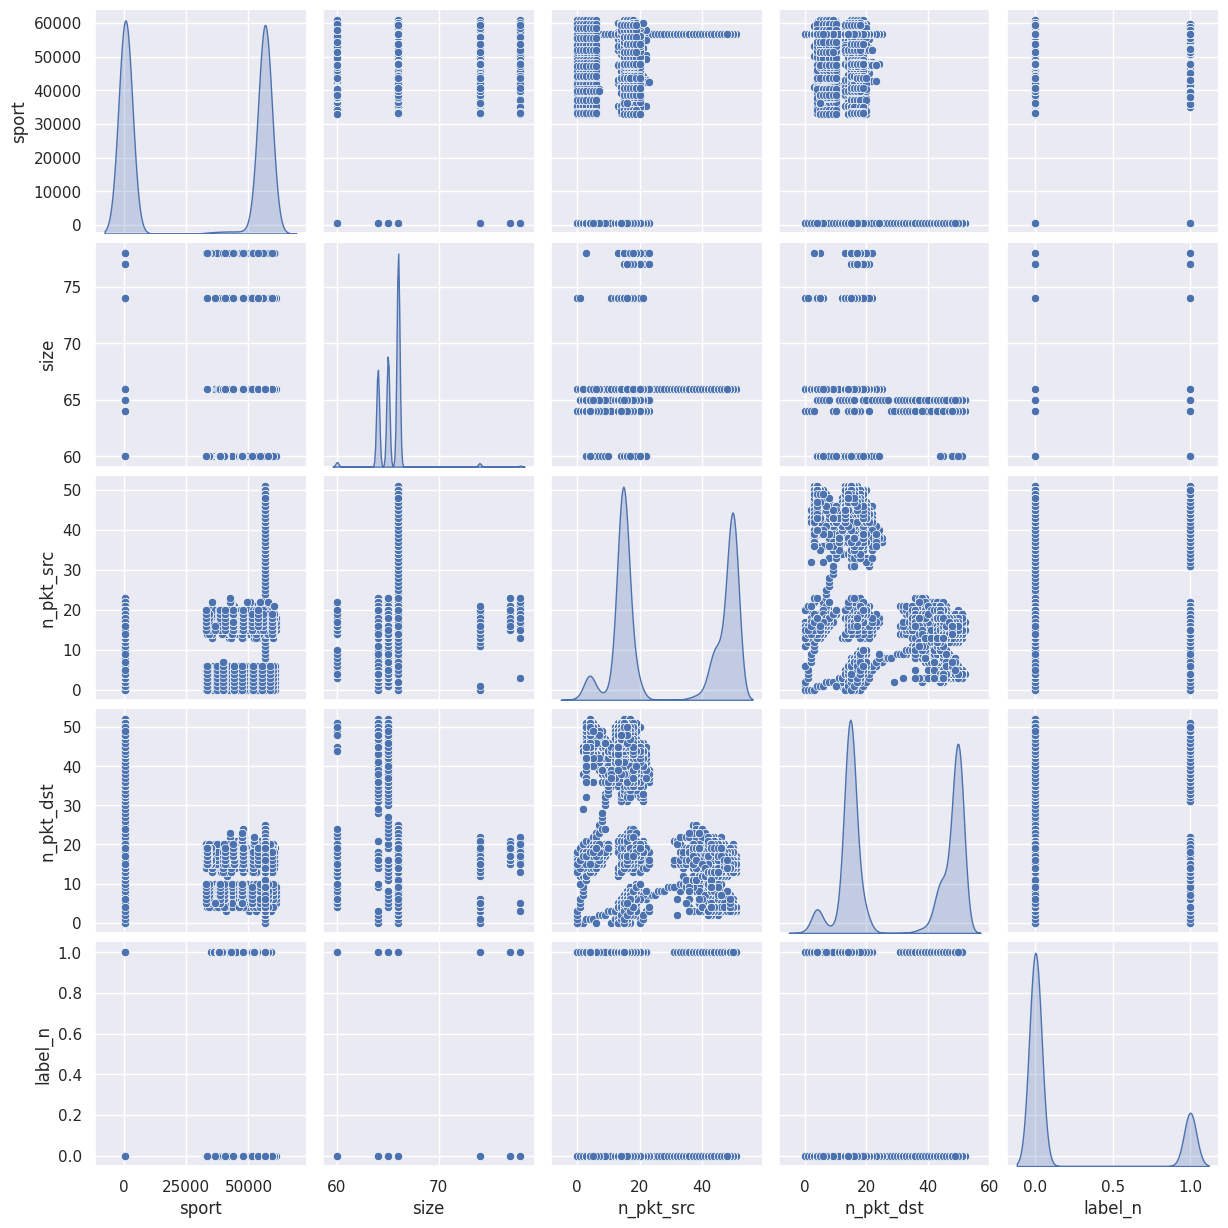

In [27]:
# distribution matrix
sns.pairplot(net_attack[NUM_COLUMNS], diag_kind="kde");

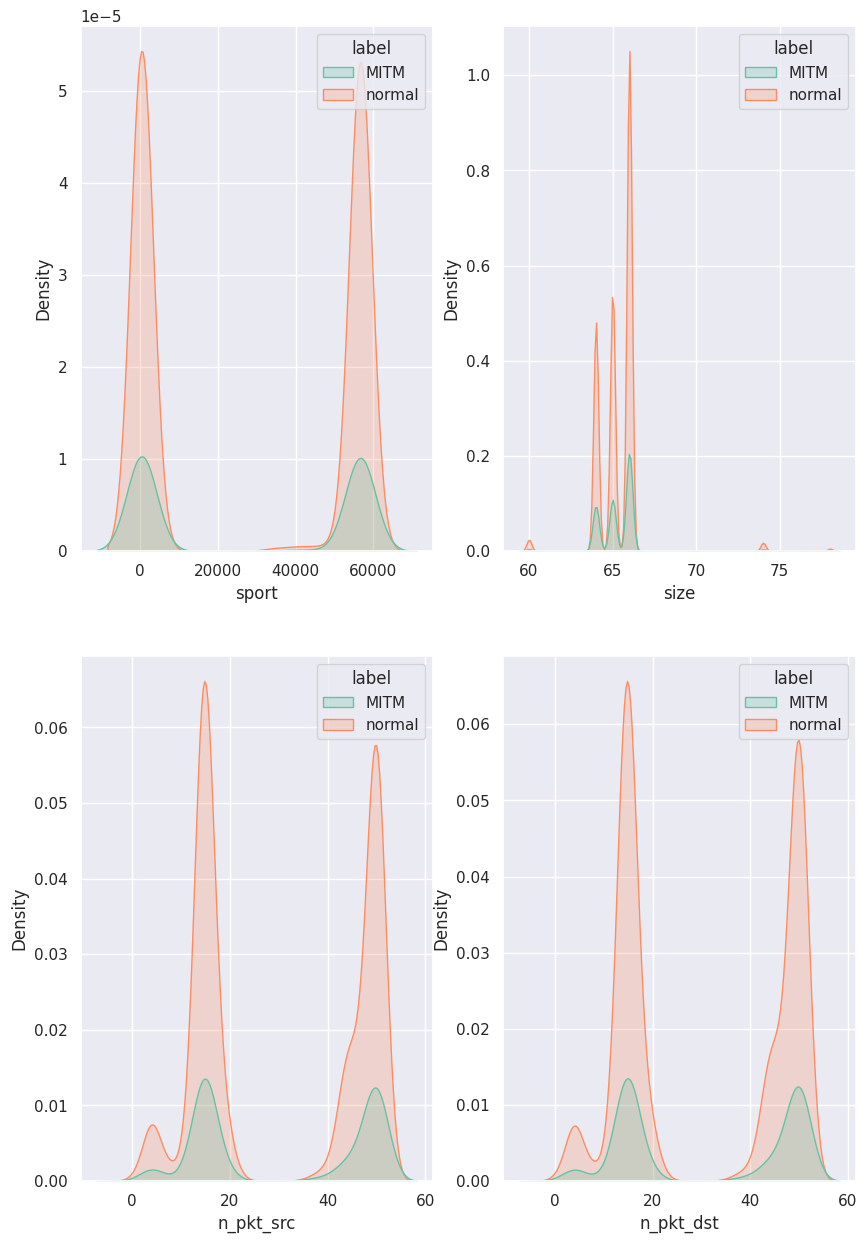

In [28]:
# KDE plots in subplots of the numerical columns per label without label_n
fig, axs = plt.subplots(2, 2, figsize=(10, 15))
index = 0
for i in range(2):
    for j in range(2):
        sns.kdeplot(data=net_attack, x=num_columns[index], hue="label", ax=axs[i, j], fill=True, palette="Set2")
        index += 1

### 4. Categorical features


In [29]:
CAT_COLUMNS = net_attack.select_dtypes(include=['object']).columns

We have categorical features:
- Time 
- mac_s 
- mac_d
- ip_s
- ip_d
- dport
- proto
- flags
- modbus_fn
- modbus_response
- label

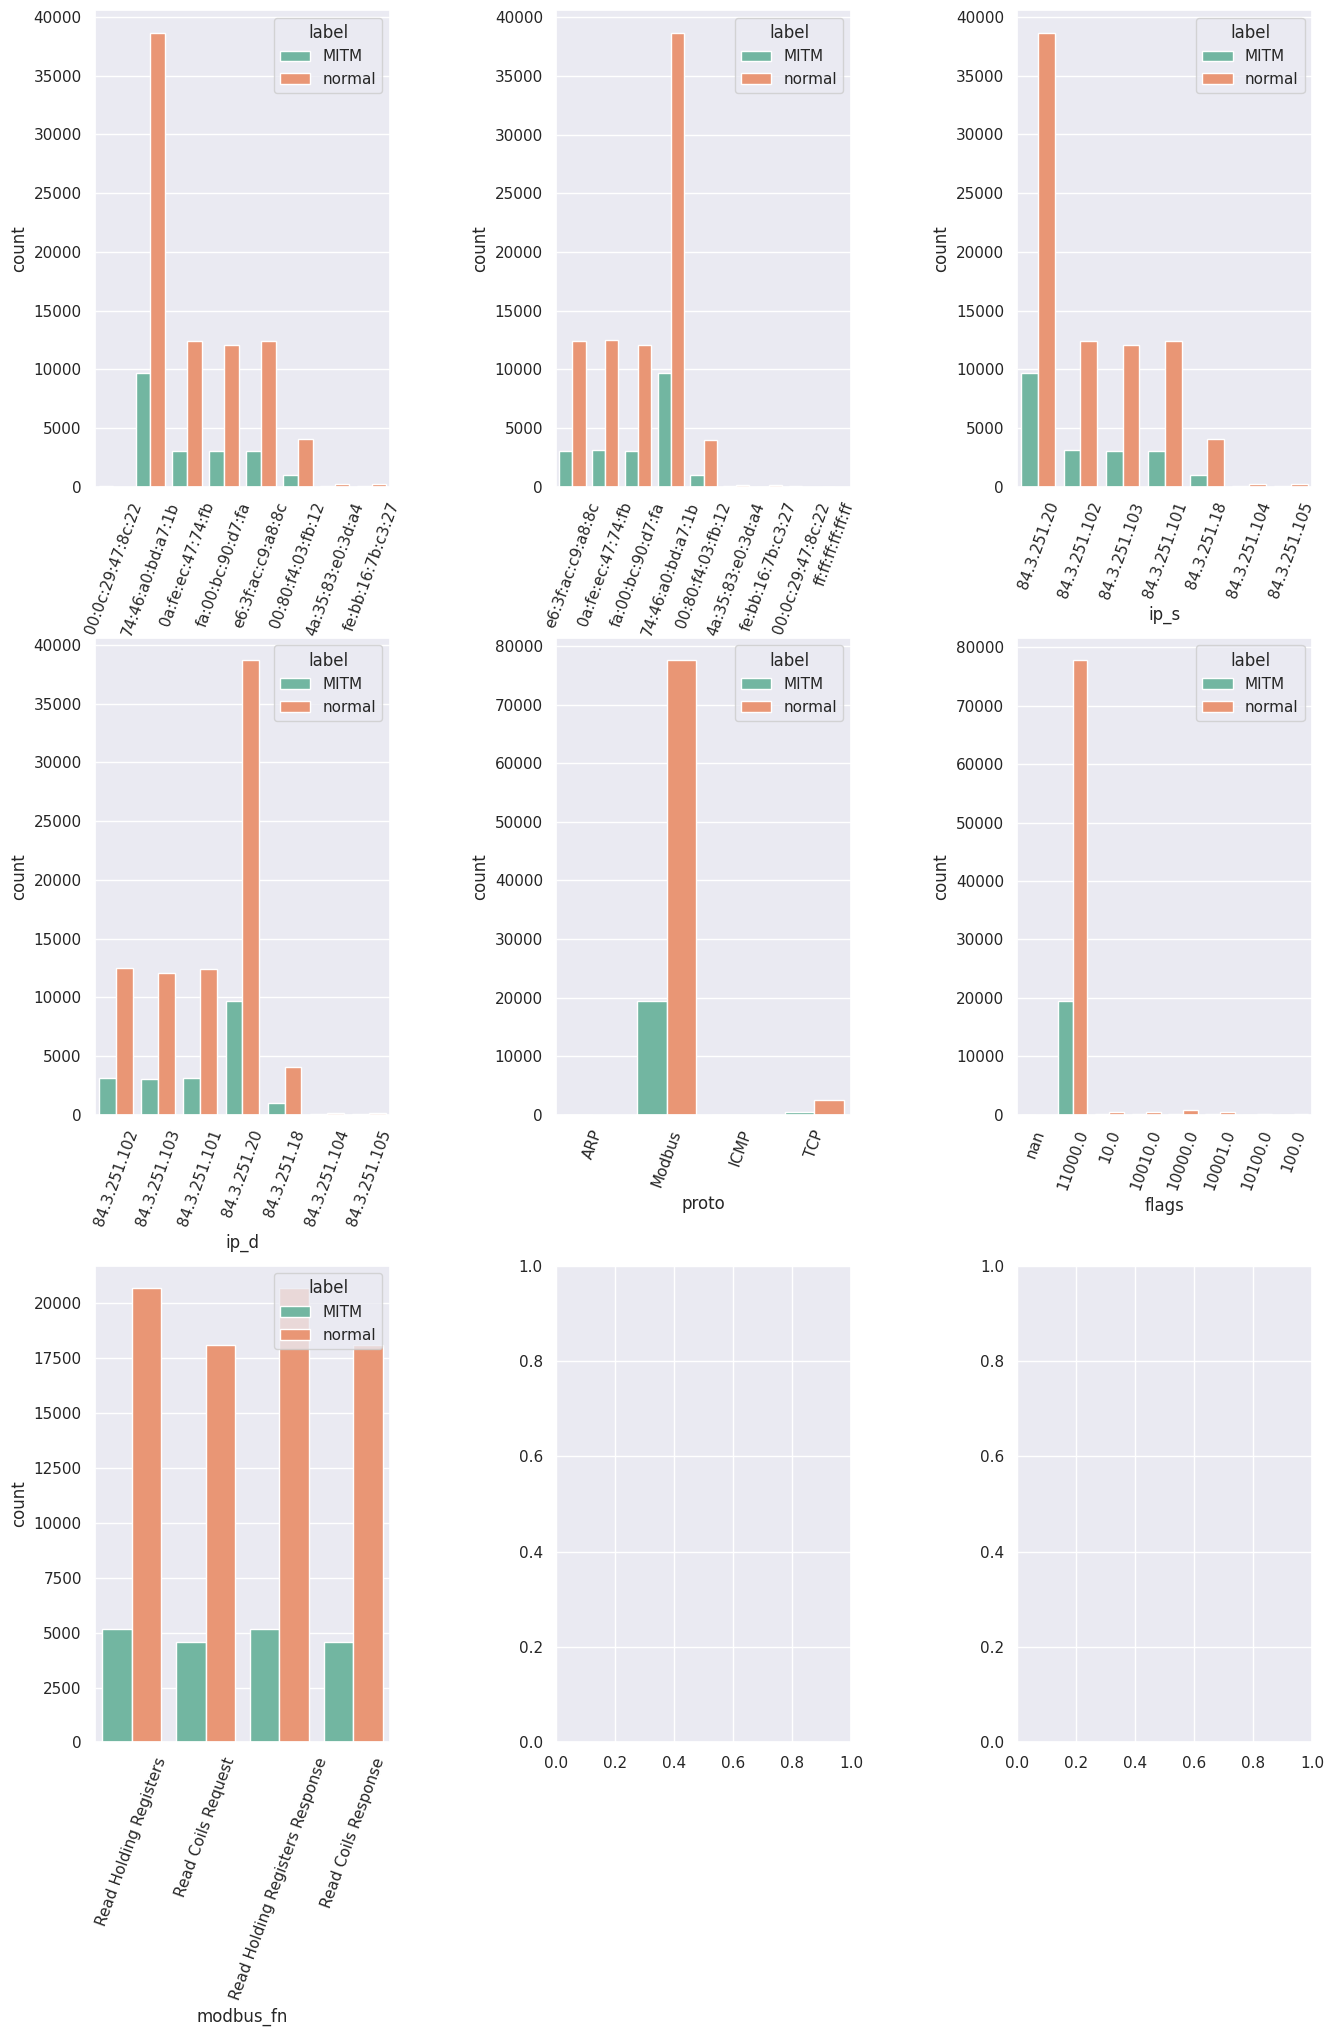

In [61]:
# Plotting the categorical columns

fig, axs = plt.subplots(3, 3, figsize=(15, 20))
fig.tight_layout(pad=7.0)
index = 0
for i in range(3):
    for j in range(3):
        if (index >= 7):
            break
        sns.countplot(data=net_attack, x=CAT_COLUMNS.drop(["Time", "label", "modbus_response", "dport"])[index], hue="label", ax=axs[i, j], palette="Set2")
        axs[i, j].tick_params(axis='x', rotation=70)
        index += 1

- `modbus_response` columns could be engineered and transform to binary (0,1)

### 5.Correlation between numerical features

Correlation heatmap (Pearson method)

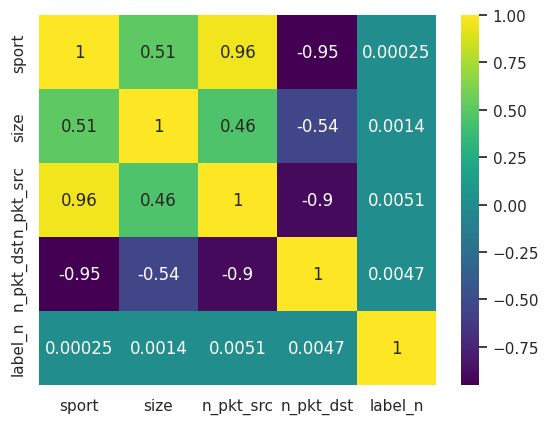

In [72]:
# Plotting correlation matrix
corr = net_attack[NUM_COLUMNS].corr()
sns.heatmap(corr, annot=True, cmap='viridis');

##### Oberservations
- n_pkt_src and n_pkt_dst are highly correlated -> we can drop one of them as they are redundant and provide the same information (same distribution)

## Modelling

In [ ]:
ml_net_attack = net_attack[NET_COLS]

In [ ]:
lof_result = lof(ml_net_attack, contam)

In [ ]:
evaluate(net_attack["label_n"].iloc[:100000], lof_result)